In [1]:
from rdkit import Chem
import sys
import os
import useful_rdkit_utils as uru
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
import itertools
import pandas as pd
from collections import Counter
import mols2grid
from tdc.single_pred import ADME
from Filtering_functions import filter_molecules
import glob
import molvs
from multiprocessing import Pool, cpu_count
from tqdm.auto import tqdm

In [2]:
# Get the current working directory
current_dir = os.getcwd()
print(current_dir)
# Get the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
print(parent_dir)
# Add the parent directory to sys.path
sys.path.append(parent_dir)

/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/three_proteins/7cky/3dsbdd
/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/three_proteins/7cky


Reading data from crossdock dataset, add a standardization for small molecule data:

In [3]:
standardizer = molvs.standardize.Standardizer()

def standardize_mol(mol):
    try:
        mol = standardizer.standardize(mol)
        mol = standardizer.fragment_parent(mol, skip_standardize=True)
        mol = standardizer.tautomer_parent(mol, skip_standardize=True)
        mol = standardizer.isotope_parent(mol, skip_standardize=True)
        mol = standardizer.charge_parent(mol, skip_standardize=True)
        return mol
    except:
        return None

In [4]:
smi_list = []
with open('/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/three_proteins/7cky/3dsbdd/500_generated.smi') as f:
    for smi in f:
        smi_list.append(smi.strip())
standardized_smiles_list = []
for smi in tqdm(smi_list, desc="Standardizing molecules", unit="mol"):
    mol = Chem.MolFromSmiles(smi)
    mol = standardize_mol(mol)
    
    if mol:
        standardized_smiles_list.append(Chem.MolToSmiles(mol))
    else:
        print(f"Skipping molecule {smi}")
        pass

print(len(smi_list))
len(standardized_smiles_list)

Standardizing molecules:   0%|          | 0/285 [00:00<?, ?mol/s]

[15:16:35] Explicit valence for atom # 12 N, 4, is greater than permitted
[15:16:35] Explicit valence for atom # 7 N, 4, is greater than permitted
[15:16:35] Explicit valence for atom # 12 N, 4, is greater than permitted
[15:16:35] Explicit valence for atom # 7 N, 4, is greater than permitted
[15:16:35] Explicit valence for atom # 13 N, 4, is greater than permitted
[15:16:35] Explicit valence for atom # 7 N, 4, is greater than permitted
[15:16:35] Explicit valence for atom # 9 N, 4, is greater than permitted
[15:16:35] Explicit valence for atom # 9 N, 4, is greater than permitted
[15:16:35] Explicit valence for atom # 16 N, 4, is greater than permitted
[15:16:35] Explicit valence for atom # 12 N, 4, is greater than permitted
[15:16:35] Explicit valence for atom # 12 N, 4, is greater than permitted
[15:16:35] Explicit valence for atom # 12 N, 4, is greater than permitted
[15:16:35] Explicit valence for atom # 11 N, 4, is greater than permitted
[15:16:35] Explicit valence for atom # 9 N,

Skipping molecule CCCCCC12CC1C(C)C1CN1(CCC(F)F)C2
Skipping molecule CCCCCC1CN2(CCC(F)(F)F)CC2C(C)C1C
Skipping molecule CCCCCC12CC1C(C)C1CN1(CCC(F)(F)F)C2
Skipping molecule CCCCCC12CN3(CCC(F)(F)F)C4C(CN)C1C2C43
Skipping molecule CCCCCC12CC1C(CN)C1CN1(CCC(F)(F)F)C2
Skipping molecule CCCCCC1CN2(CCC(F)(F)F)CC2C(C2CN2)C1C
Skipping molecule Cc1c2c(cc3c1C1CN1(C1CCC4OC41)CC3)C(C)CCC2
Skipping molecule Cc1c2c(cc3c1C1CN1(C1CCC4OC41)CC3)C(C)C=CC2
Skipping molecule CCCC(CCC1C2C3CC3C3CC34CCN12C1OC14)C(C)C
Skipping molecule CC1CCCC2C(C)C3C(CCN4(C5CCC(=O)C5)CC34)CC12
Skipping molecule CC1CCCC2C(C)C3C(CCN4(C5CCC6OC65)CC34)CC12
Skipping molecule CC1C=CCC2C(C)C3C(CCN4(C5CCC6OC65)CC34)CC12
Skipping molecule C=C1CCCC2C1CC1CCN3(C4CCC5OC54)CC3C1C2C
Skipping molecule Cc1c2c(cc3c1C1CN1(C1CCC(O)C1)CC3)C(C)C=CC2
Skipping molecule CC1C2CCCC(=C=O)C2CC2CCN3(C4CCC(=O)C4)CC3C21
Skipping molecule CC1C2CCCC(=C=O)C2CC2CCN3(C4CCC5OC54)CC3C21
Skipping molecule CC1C2CCCC(C=O)C2CC2CCN3(C4CCC5OC54)CC3C21
Skipping molecule C

[15:16:35] Explicit valence for atom # 5 N, 4, is greater than permitted
[15:16:36] Explicit valence for atom # 9 N, 4, is greater than permitted


Skipping molecule COC(CCN12CCC3CC4(CC4(C)C)C(C)C(C)C3C1C2)COO
Skipping molecule CC(CO)C12CC3CCN4(C5CCCCC5)CC4C3C(CO)C1(C)C2
285


260

Set the default image size

In [5]:
with open('500_generated_standardized.smi', 'w') as f:
    for item in standardized_smiles_list:
        f.write("%s\n" % item)

In [6]:
uru.rd_set_image_size(300,300)

Convert SMILES and name of them to a dataframe

In [8]:
df = pd.DataFrame(standardized_smiles_list, columns=['SMILES'])
df

,SMILES
0,CCNC
1,C1CCCC1
2,CC1CCCC1
3,C1=CCCCC1
4,C1CCCCC1
...,...
255,CC1C(C)C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2CC2)C2C(C...
256,CC1C2C(C(N)O)C2C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2C...
257,CC1C(CO)C(CO)C2C(C)C2C1CCC1C(=N)OC2C3OC3C3(O)O...
258,CC1C(C)C(C)C2(C)C(CO)C2C1CCC1C(=N)OC2C3OC3C3(O...


Remove repeated molecules

In [9]:
df = df.drop_duplicates(['SMILES'])
df.reset_index(inplace=True, drop=True)
df

,SMILES
0,CCNC
1,C1CCCC1
2,CC1CCCC1
3,C1=CCCCC1
4,C1CCCCC1
...,...
255,CC1C(C)C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2CC2)C2C(C...
256,CC1C2C(C(N)O)C2C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2C...
257,CC1C(CO)C(CO)C2C(C)C2C1CCC1C(=N)OC2C3OC3C3(O)O...
258,CC1C(C)C(C)C2(C)C(CO)C2C1CCC1C(=N)OC2C3OC3C3(O...


Save the smi file for further use

Add an RDKit molecule to the dataframe

In [10]:
df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)

Strip salts from the molecule

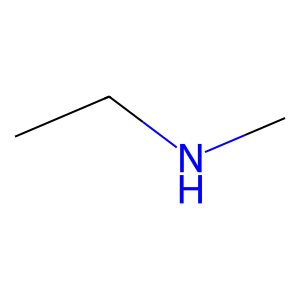

In [11]:
df.mol = df.mol.apply(uru.get_largest_fragment)
df.mol[0]

Instantiate a RingSystemFinder object and find ring systems for the molecules in df

In [12]:
ring_system_finder = uru.RingSystemFinder()
df['ring_sytems'] = df.mol.apply(ring_system_finder.find_ring_systems)
df.ring_sytems

0                                                     []
1                                              [C1CCCC1]
2                                              [C1CCCC1]
3                                            [C1=CCCCC1]
4                                             [C1CCCCC1]
                             ...                        
255         [C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]
256    [C1CC2(CC2)CC2CC12, N=C1CNC2C3OC3C3OC3C2O1, C1...
257         [C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]
258         [C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]
259    [C1CC2(CC2)CC2CC12, N=C1CNC2C3OC3C3OC3C2O1, C1...
Name: ring_sytems, Length: 260, dtype: object

In [13]:
df.ring_sytems.values

array([list([]), list(['C1CCCC1']), list(['C1CCCC1']),
       list(['C1=CCCCC1']), list(['C1CCCCC1']), list(['C1=CCCCC1']),
       list(['C1CCCCC1']), list([]), list(['c1cc[nH]c1']),
       list(['C1CCNC1']), list(['C1CCNCC1']), list([]), list([]),
       list(['C1CC2CC2CN1']), list([]), list(['C1CCNC1']),
       list(['C1CCCCC1']), list([]), list([]), list(['C1=CCCCC1']),
       list(['C1CC1']), list(['c1ccccc1']), list(['C1=CCCCC1']),
       list(['C1CCCCC1', 'C1CCNCC1']), list(['C1CCNC1']),
       list(['C1CCNC1']), list([]), list(['C1CCNC1']), list(['C1CCNCC1']),
       list(['C1CCNCC1']), list(['C1CCNC1']), list(['C1CCNCC1']),
       list(['C1CCNC1']), list(['c1ccccc1', 'C1CCNCC1']),
       list(['C1CCNCC1']), list(['c1ccccc1']),
       list(['N=C1CCCCC1', 'C1CCNCC1']), list(['C1CCNC1']),
       list(['C1CCNCC1']), list(['C1CCCCC1', 'C1CCNCC1']),
       list(['C1CCNCC1']), list(['C1=CCCCC1', 'C1CCNCC1']), list([]),
       list(['c1ccccc1']), list(['C1CC1']), list(['c1ccccc1']),
  

See how many times each ring system occurs

In [14]:
ring_system_list = list(itertools.chain.from_iterable(df.ring_sytems.values))
ring_count_df = pd.DataFrame(Counter(ring_system_list).items(),columns=["SMILES","Count"]) ### Convert a dictionary to a DataFrame.
ring_count_df.sort_values("Count",ascending=False,inplace=True)
ring_count_df

,SMILES,Count
7,C1CC1,120
5,C1CCNCC1,68
4,C1CCNC1,46
2,C1CCCCC1,28
45,C1CCC2CC2C1,27
...,...,...
52,C1=CC2CC2CC1,1
53,C1CCCN2CCCOCC2CC1,1
54,C1CCN2CCC(CC2)C2CC2C1,1
55,C=C1C2CC2CC2CC12,1


View the ring system frequencies

In [15]:
mols2grid.display(ring_count_df,subset=["img","Count"])

MolGridWidget()

The RingSystemLookup object has a dictionary of how many times each ring system occurs in the ChEMBL database.  We can use this object to evaluate the molecules in df.

In [16]:
ring_system_lookup = uru.RingSystemLookup()
res = df.mol.apply(ring_system_lookup.process_mol)

In [17]:
res

0                                                     []
1                                     [(C1CCCC1, 38317)]
2                                     [(C1CCCC1, 38317)]
3                                    [(C1=CCCCC1, 8353)]
4                                    [(C1CCCCC1, 90332)]
                             ...                        
255    [(C1CCC2CC2C1, 101), (N=C1CNC2C3OC3C3OC3C2O1, ...
256    [(C1CC2(CC2)CC2CC12, 0), (N=C1CNC2C3OC3C3OC3C2...
257    [(C1CCC2CC2C1, 101), (N=C1CNC2C3OC3C3OC3C2O1, ...
258    [(C1CCC2CC2C1, 101), (N=C1CNC2C3OC3C3OC3C2O1, ...
259    [(C1CC2(CC2)CC2CC12, 0), (N=C1CNC2C3OC3C3OC3C2...
Name: mol, Length: 260, dtype: object

In [18]:
df[['min_ring','min_freq']] = res.apply(uru.get_min_ring_frequency).tolist()
df

,SMILES,mol,ring_sytems,min_ring,min_freq
0,CCNC,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330350>,[],,-1
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,38317
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,38317
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,8353
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,90332
...,...,...,...,...,...
255,CC1C(C)C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2CC2)C2C(C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece340>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0
256,CC1C2C(C(N)O)C2C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece3b0>,"[C1CC2(CC2)CC2CC12, N=C1CNC2C3OC3C3OC3C2O1, C1...",C1CC2(CC2)CC2CC12,0
257,CC1C(CO)C(CO)C2C(C)C2C1CCC1C(=N)OC2C3OC3C3(O)O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece420>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0
258,CC1C(C)C(C)C2(C)C(CO)C2C1CCC1C(=N)OC2C3OC3C3(O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece490>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0


In [19]:
mols2grid.display(df.sort_values("min_freq"),mol_col="mol",subset=["img","min_freq"])

MolGridWidget()

### Check how many molecules are unique the ring frequency of them

How many molecules are unique using inChI?

In [20]:
df['inchi'] = df.mol.apply(Chem.MolToInchi)
df = df.drop_duplicates("inchi", keep="first", ignore_index=True)
df

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefined stereo

[15:17:56] WARNING: Omitted undefi

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi
0,CCNC,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330350>,[],,-1,"InChI=1S/C3H9N/c1-3-4-2/h4H,3H2,1-2H3"
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,38317,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,38317,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3"
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,8353,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2"
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,90332,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2
...,...,...,...,...,...,...
255,CC1C(C)C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2CC2)C2C(C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece340>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H37N3O5/c1-8-9(2)12(7-28)15-14(16(...
256,CC1C2C(C(N)O)C2C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece3b0>,"[C1CC2(CC2)CC2CC12, N=C1CNC2C3OC3C3OC3C2O1, C1...",C1CC2(CC2)CC2CC12,0,InChI=1S/C25H37N3O4/c1-9-10(2)25(7-8-25)12(15-...
257,CC1C(CO)C(CO)C2C(C)C2C1CCC1C(=N)OC2C3OC3C3(O)O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece420>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H36N2O6/c1-9-12(16-10(2)17(16)14(8...
258,CC1C(C)C(C)C2(C)C(CO)C2C1CCC1C(=N)OC2C3OC3C3(O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece490>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C25H38N2O5/c1-10-11(2)14(17-15(9-28)2...


How many of them have ring system?

In [21]:
df_ring = df[df.min_freq != -1]
df_ring

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,38317,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,38317,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3"
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,8353,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2"
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,90332,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2
5,CC1C=CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330c80>,[C1=CCCCC1],C1=CCCCC1,8353,"InChI=1S/C7H12/c1-7-5-3-2-4-6-7/h3,5,7H,2,4,6H..."
...,...,...,...,...,...,...
255,CC1C(C)C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2CC2)C2C(C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece340>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H37N3O5/c1-8-9(2)12(7-28)15-14(16(...
256,CC1C2C(C(N)O)C2C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece3b0>,"[C1CC2(CC2)CC2CC12, N=C1CNC2C3OC3C3OC3C2O1, C1...",C1CC2(CC2)CC2CC12,0,InChI=1S/C25H37N3O4/c1-9-10(2)25(7-8-25)12(15-...
257,CC1C(CO)C(CO)C2C(C)C2C1CCC1C(=N)OC2C3OC3C3(O)O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece420>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H36N2O6/c1-9-12(16-10(2)17(16)14(8...
258,CC1C(C)C(C)C2(C)C(CO)C2C1CCC1C(=N)OC2C3OC3C3(O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece490>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C25H38N2O5/c1-10-11(2)14(17-15(9-28)2...


In [22]:
filtered_df_ring_freq = df[df.min_freq > 100]
filtered_df_ring_freq

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,38317,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,38317,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3"
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,8353,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2"
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,90332,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2
5,CC1C=CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330c80>,[C1=CCCCC1],C1=CCCCC1,8353,"InChI=1S/C7H12/c1-7-5-3-2-4-6-7/h3,5,7H,2,4,6H..."
...,...,...,...,...,...,...
217,CC1C(C)C(CCC2CCCC(C)N2C2CC2)C2C(CO)C2C1CO,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd2a0>,"[C1CCC2CC2C1, C1CCNCC1, C1CC1]",C1CCC2CC2C1,101,InChI=1S/C22H39NO2/c1-13-5-4-6-16(23(13)17-7-8...
219,C=CCCC(CCCN1CCC(C2CC2C#CC)CC1)CCC1CC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd380>,"[C1CCNCC1, C1CC1, C1CC1]",C1CC1,90040,InChI=1S/C24H39N/c1-3-5-8-20(10-11-21-12-13-21...
221,CC1C(C)C(CCC2CCCC(C)N2C2CC2)C2C(C(O)O)C2C1C,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd460>,"[C1CCC2CC2C1, C1CCNCC1, C1CC1]",C1CCC2CC2C1,101,InChI=1S/C22H39NO2/c1-12-6-5-7-16(23(12)17-8-9...
228,CC(F)CCC1C2C(C)C(C)C(C)C(CCC3COCC(C)N3C3CC3)C12,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd770>,"[C1CCC2CC2C1, C1COCCN1, C1CC1]",C1CCC2CC2C1,101,InChI=1S/C24H42FNO/c1-14(25)6-10-22-23-18(5)16...


### How many of them could pass PAINS filter?

Get a list of rules

In [23]:
reos = uru.REOS()
reos.get_available_rule_sets()

array(['Glaxo', 'Dundee', 'BMS', 'PAINS', 'SureChEMBL', 'MLSMR',
       'Inpharmatica', 'LINT'], dtype=object)

Get the currently active rule sets

In [24]:
reos.get_active_rule_sets()

array(['Glaxo'], dtype=object)

Set active rule set to PAINS

In [25]:
reos.set_active_rule_sets(['PAINS'])
reos.get_active_rule_sets()

array(['PAINS'], dtype=object)

Apply PAINS filter to unique mols

In [26]:
reos.pandas_mols(df.mol)

  0%|          | 0/260 [00:00<?, ?it/s]

,rule_set_name,description
0,ok,ok
1,ok,ok
2,ok,ok
3,ok,ok
4,ok,ok
...,...,...
255,ok,ok
256,ok,ok
257,ok,ok
258,ok,ok


In [27]:
df_PAINS_filter = pd.concat([df, reos.pandas_mols(df.mol)], axis=1)
df_PAINS_filter = df_PAINS_filter[df_PAINS_filter.description == 'ok']
df_PAINS_filter

  0%|          | 0/260 [00:00<?, ?it/s]

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,rule_set_name,description
0,CCNC,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330350>,[],,-1,"InChI=1S/C3H9N/c1-3-4-2/h4H,3H2,1-2H3",ok,ok
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,38317,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,ok,ok
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,38317,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3",ok,ok
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,8353,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2",ok,ok
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,90332,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2,ok,ok
...,...,...,...,...,...,...,...,...
255,CC1C(C)C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2CC2)C2C(C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece340>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H37N3O5/c1-8-9(2)12(7-28)15-14(16(...,ok,ok
256,CC1C2C(C(N)O)C2C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece3b0>,"[C1CC2(CC2)CC2CC12, N=C1CNC2C3OC3C3OC3C2O1, C1...",C1CC2(CC2)CC2CC12,0,InChI=1S/C25H37N3O4/c1-9-10(2)25(7-8-25)12(15-...,ok,ok
257,CC1C(CO)C(CO)C2C(C)C2C1CCC1C(=N)OC2C3OC3C3(O)O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece420>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H36N2O6/c1-9-12(16-10(2)17(16)14(8...,ok,ok
258,CC1C(C)C(C)C2(C)C(CO)C2C1CCC1C(=N)OC2C3OC3C3(O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece490>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C25H38N2O5/c1-10-11(2)14(17-15(9-28)2...,ok,ok


Test all filters from rd filters

In [28]:
rd_filters = ['Glaxo', 'Dundee', 'BMS', 'SureChEMBL', 'MLSMR', 'Inpharmatica', 'LINT']
for filter in rd_filters:
    reos.set_active_rule_sets([filter])
    new_df = reos.pandas_mols(df.mol)
    print(filter, len(new_df[new_df.description == "ok"])/len(new_df), reos.get_active_rule_sets(), len(new_df[new_df.description == "ok"]))

  0%|          | 0/260 [00:00<?, ?it/s]

Glaxo 0.8384615384615385 ['Glaxo'] 218


  0%|          | 0/260 [00:00<?, ?it/s]

Dundee 0.3038461538461538 ['Dundee'] 79


  0%|          | 0/260 [00:00<?, ?it/s]

BMS 0.7923076923076923 ['BMS'] 206


  0%|          | 0/260 [00:00<?, ?it/s]

SureChEMBL 0.6461538461538462 ['SureChEMBL'] 168


  0%|          | 0/260 [00:00<?, ?it/s]

MLSMR 0.45 ['MLSMR'] 117


  0%|          | 0/260 [00:00<?, ?it/s]

Inpharmatica 0.8307692307692308 ['Inpharmatica'] 216


  0%|          | 0/260 [00:00<?, ?it/s]

LINT 0.6576923076923077 ['LINT'] 171


### How many of them could pass filters suggested by Dr.Reymond?

In [29]:
df['Reymond'] = df.mol.apply(filter_molecules)
df

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond
0,CCNC,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330350>,[],,-1,"InChI=1S/C3H9N/c1-3-4-2/h4H,3H2,1-2H3",True
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,38317,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,True
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,38317,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3",True
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,8353,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2",True
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,90332,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2,True
...,...,...,...,...,...,...,...
255,CC1C(C)C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2CC2)C2C(C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece340>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H37N3O5/c1-8-9(2)12(7-28)15-14(16(...,True
256,CC1C2C(C(N)O)C2C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece3b0>,"[C1CC2(CC2)CC2CC12, N=C1CNC2C3OC3C3OC3C2O1, C1...",C1CC2(CC2)CC2CC12,0,InChI=1S/C25H37N3O4/c1-9-10(2)25(7-8-25)12(15-...,True
257,CC1C(CO)C(CO)C2C(C)C2C1CCC1C(=N)OC2C3OC3C3(O)O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece420>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H36N2O6/c1-9-12(16-10(2)17(16)14(8...,True
258,CC1C(C)C(C)C2(C)C(CO)C2C1CCC1C(=N)OC2C3OC3C3(O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece490>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C25H38N2O5/c1-10-11(2)14(17-15(9-28)2...,True


In [30]:
df_Reymond_filter = df[df.Reymond == True]
df_Reymond_filter

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond
0,CCNC,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330350>,[],,-1,"InChI=1S/C3H9N/c1-3-4-2/h4H,3H2,1-2H3",True
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,38317,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,True
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,38317,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3",True
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,8353,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2",True
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,90332,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2,True
...,...,...,...,...,...,...,...
255,CC1C(C)C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2CC2)C2C(C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece340>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H37N3O5/c1-8-9(2)12(7-28)15-14(16(...,True
256,CC1C2C(C(N)O)C2C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece3b0>,"[C1CC2(CC2)CC2CC12, N=C1CNC2C3OC3C3OC3C2O1, C1...",C1CC2(CC2)CC2CC12,0,InChI=1S/C25H37N3O4/c1-9-10(2)25(7-8-25)12(15-...,True
257,CC1C(CO)C(CO)C2C(C)C2C1CCC1C(=N)OC2C3OC3C3(O)O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece420>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H36N2O6/c1-9-12(16-10(2)17(16)14(8...,True
258,CC1C(C)C(C)C2(C)C(CO)C2C1CCC1C(=N)OC2C3OC3C3(O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece490>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C25H38N2O5/c1-10-11(2)14(17-15(9-28)2...,True


### How many of them could pass RO5?

In [31]:
def passes_rule_of_five(smiles):
    """Determine if a molecule passes Lipinski's Rule of Five."""
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        hbd = Descriptors.NumHDonors(mol)  # Hydrogen bond donors
        hba = Descriptors.NumHAcceptors(mol)  # Hydrogen bond acceptors
        mw = Descriptors.MolWt(mol)  # Molecular weight
        logp = Descriptors.MolLogP(mol)  # LogP
        
        # Check Lipinski's Rule of Five criteria
        if hbd <= 5 and hba <= 10 and mw <= 500 and logp <= 5:
            return True
    return False

df['Lipinski'] = df.SMILES.apply(passes_rule_of_five)
df

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
0,CCNC,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330350>,[],,-1,"InChI=1S/C3H9N/c1-3-4-2/h4H,3H2,1-2H3",True,True
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,38317,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,True,True
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,38317,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3",True,True
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,8353,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2",True,True
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,90332,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2,True,True
...,...,...,...,...,...,...,...,...
255,CC1C(C)C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2CC2)C2C(C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece340>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H37N3O5/c1-8-9(2)12(7-28)15-14(16(...,True,True
256,CC1C2C(C(N)O)C2C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece3b0>,"[C1CC2(CC2)CC2CC12, N=C1CNC2C3OC3C3OC3C2O1, C1...",C1CC2(CC2)CC2CC12,0,InChI=1S/C25H37N3O4/c1-9-10(2)25(7-8-25)12(15-...,True,True
257,CC1C(CO)C(CO)C2C(C)C2C1CCC1C(=N)OC2C3OC3C3(O)O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece420>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H36N2O6/c1-9-12(16-10(2)17(16)14(8...,True,True
258,CC1C(C)C(C)C2(C)C(CO)C2C1CCC1C(=N)OC2C3OC3C3(O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece490>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C25H38N2O5/c1-10-11(2)14(17-15(9-28)2...,True,True


In [32]:
df_Lipinski_filter = df[df.Lipinski == True]
df_Lipinski_filter

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
0,CCNC,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330350>,[],,-1,"InChI=1S/C3H9N/c1-3-4-2/h4H,3H2,1-2H3",True,True
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,38317,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,True,True
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,38317,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3",True,True
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,8353,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2",True,True
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,90332,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2,True,True
...,...,...,...,...,...,...,...,...
255,CC1C(C)C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2CC2)C2C(C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece340>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H37N3O5/c1-8-9(2)12(7-28)15-14(16(...,True,True
256,CC1C2C(C(N)O)C2C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece3b0>,"[C1CC2(CC2)CC2CC12, N=C1CNC2C3OC3C3OC3C2O1, C1...",C1CC2(CC2)CC2CC12,0,InChI=1S/C25H37N3O4/c1-9-10(2)25(7-8-25)12(15-...,True,True
257,CC1C(CO)C(CO)C2C(C)C2C1CCC1C(=N)OC2C3OC3C3(O)O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece420>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H36N2O6/c1-9-12(16-10(2)17(16)14(8...,True,True
258,CC1C(C)C(C)C2(C)C(CO)C2C1CCC1C(=N)OC2C3OC3C3(O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece490>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C25H38N2O5/c1-10-11(2)14(17-15(9-28)2...,True,True


### Molecules' performance in ring systems from ZINC22 database druglike molecules

In [33]:
ring_system_lookup_ZINC22 = uru.RingSystemLookup(ring_file="/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/ZINC22_rings_system.csv")
res_zinc22 = df.mol.apply(ring_system_lookup_ZINC22.process_mol)
res_zinc22

0                                                     []
1                                [(C1CCCC1, 5317217694)]
2                                [(C1CCCC1, 5317217694)]
3                              [(C1=CCCCC1, 1045888108)]
4                               [(C1CCCCC1, 4295567520)]
                             ...                        
255    [(C1CCC2CC2C1, 153492), (N=C1CNC2C3OC3C3OC3C2O...
256    [(C1CC2(CC2)CC2CC12, 0), (N=C1CNC2C3OC3C3OC3C2...
257    [(C1CCC2CC2C1, 153492), (N=C1CNC2C3OC3C3OC3C2O...
258    [(C1CCC2CC2C1, 153492), (N=C1CNC2C3OC3C3OC3C2O...
259    [(C1CC2(CC2)CC2CC12, 0), (N=C1CNC2C3OC3C3OC3C2...
Name: mol, Length: 260, dtype: object

In [34]:
df[['min_ring','min_freq']] = res_zinc22.apply(uru.get_min_ring_frequency).tolist()
df

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
0,CCNC,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330350>,[],,-1,"InChI=1S/C3H9N/c1-3-4-2/h4H,3H2,1-2H3",True,True
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,5317217694,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,True,True
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,5317217694,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3",True,True
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,1045888108,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2",True,True
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,4295567520,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2,True,True
...,...,...,...,...,...,...,...,...
255,CC1C(C)C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2CC2)C2C(C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece340>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H37N3O5/c1-8-9(2)12(7-28)15-14(16(...,True,True
256,CC1C2C(C(N)O)C2C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece3b0>,"[C1CC2(CC2)CC2CC12, N=C1CNC2C3OC3C3OC3C2O1, C1...",C1CC2(CC2)CC2CC12,0,InChI=1S/C25H37N3O4/c1-9-10(2)25(7-8-25)12(15-...,True,True
257,CC1C(CO)C(CO)C2C(C)C2C1CCC1C(=N)OC2C3OC3C3(O)O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece420>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C24H36N2O6/c1-9-12(16-10(2)17(16)14(8...,True,True
258,CC1C(C)C(C)C2(C)C(CO)C2C1CCC1C(=N)OC2C3OC3C3(O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece490>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",N=C1CNC2C3OC3C3OC3C2O1,0,InChI=1S/C25H38N2O5/c1-10-11(2)14(17-15(9-28)2...,True,True


In [35]:
mols2grid.display(df.sort_values("min_freq"),mol_col="mol",subset=["img","min_freq"])

MolGridWidget()

In [36]:
filtered_df_ring_freq = df[(df.min_freq > 100) & (df.min_freq != -1)]
filtered_df_ring_freq

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,5317217694,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,True,True
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,5317217694,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3",True,True
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,1045888108,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2",True,True
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,4295567520,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2,True,True
5,CC1C=CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330c80>,[C1=CCCCC1],C1=CCCCC1,1045888108,"InChI=1S/C7H12/c1-7-5-3-2-4-6-7/h3,5,7H,2,4,6H...",True,True
...,...,...,...,...,...,...,...,...
217,CC1C(C)C(CCC2CCCC(C)N2C2CC2)C2C(CO)C2C1CO,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd2a0>,"[C1CCC2CC2C1, C1CCNCC1, C1CC1]",C1CCC2CC2C1,153492,InChI=1S/C22H39NO2/c1-13-5-4-6-16(23(13)17-7-8...,True,True
219,C=CCCC(CCCN1CCC(C2CC2C#CC)CC1)CCC1CC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd380>,"[C1CCNCC1, C1CC1, C1CC1]",C1CCNCC1,12225942610,InChI=1S/C24H39N/c1-3-5-8-20(10-11-21-12-13-21...,True,False
221,CC1C(C)C(CCC2CCCC(C)N2C2CC2)C2C(C(O)O)C2C1C,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd460>,"[C1CCC2CC2C1, C1CCNCC1, C1CC1]",C1CCC2CC2C1,153492,InChI=1S/C22H39NO2/c1-12-6-5-7-16(23(12)17-8-9...,True,True
228,CC(F)CCC1C2C(C)C(C)C(C)C(CCC3COCC(C)N3C3CC3)C12,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd770>,"[C1CCC2CC2C1, C1COCCN1, C1CC1]",C1CCC2CC2C1,153492,InChI=1S/C24H42FNO/c1-14(25)6-10-22-23-18(5)16...,True,False


In [37]:
filtered_df_ring_freq = df[(df.min_freq > 0) & (df.min_freq != -1)]
filtered_df_ring_freq

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,5317217694,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,True,True
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,5317217694,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3",True,True
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,1045888108,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2",True,True
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,4295567520,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2,True,True
5,CC1C=CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330c80>,[C1=CCCCC1],C1=CCCCC1,1045888108,"InChI=1S/C7H12/c1-7-5-3-2-4-6-7/h3,5,7H,2,4,6H...",True,True
...,...,...,...,...,...,...,...,...
217,CC1C(C)C(CCC2CCCC(C)N2C2CC2)C2C(CO)C2C1CO,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd2a0>,"[C1CCC2CC2C1, C1CCNCC1, C1CC1]",C1CCC2CC2C1,153492,InChI=1S/C22H39NO2/c1-13-5-4-6-16(23(13)17-7-8...,True,True
219,C=CCCC(CCCN1CCC(C2CC2C#CC)CC1)CCC1CC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd380>,"[C1CCNCC1, C1CC1, C1CC1]",C1CCNCC1,12225942610,InChI=1S/C24H39N/c1-3-5-8-20(10-11-21-12-13-21...,True,False
221,CC1C(C)C(CCC2CCCC(C)N2C2CC2)C2C(C(O)O)C2C1C,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd460>,"[C1CCC2CC2C1, C1CCNCC1, C1CC1]",C1CCC2CC2C1,153492,InChI=1S/C22H39NO2/c1-12-6-5-7-16(23(12)17-8-9...,True,True
228,CC(F)CCC1C2C(C)C(C)C(C)C(CCC3COCC(C)N3C3CC3)C12,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd770>,"[C1CCC2CC2C1, C1COCCN1, C1CC1]",C1CCC2CC2C1,153492,InChI=1S/C24H42FNO/c1-14(25)6-10-22-23-18(5)16...,True,False


In [38]:
filtered_df_ring_freq = df[(df.min_freq > 10) & (df.min_freq != -1)]
filtered_df_ring_freq

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,5317217694,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,True,True
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,5317217694,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3",True,True
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,1045888108,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2",True,True
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,4295567520,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2,True,True
5,CC1C=CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330c80>,[C1=CCCCC1],C1=CCCCC1,1045888108,"InChI=1S/C7H12/c1-7-5-3-2-4-6-7/h3,5,7H,2,4,6H...",True,True
...,...,...,...,...,...,...,...,...
217,CC1C(C)C(CCC2CCCC(C)N2C2CC2)C2C(CO)C2C1CO,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd2a0>,"[C1CCC2CC2C1, C1CCNCC1, C1CC1]",C1CCC2CC2C1,153492,InChI=1S/C22H39NO2/c1-13-5-4-6-16(23(13)17-7-8...,True,True
219,C=CCCC(CCCN1CCC(C2CC2C#CC)CC1)CCC1CC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd380>,"[C1CCNCC1, C1CC1, C1CC1]",C1CCNCC1,12225942610,InChI=1S/C24H39N/c1-3-5-8-20(10-11-21-12-13-21...,True,False
221,CC1C(C)C(CCC2CCCC(C)N2C2CC2)C2C(C(O)O)C2C1C,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd460>,"[C1CCC2CC2C1, C1CCNCC1, C1CC1]",C1CCC2CC2C1,153492,InChI=1S/C22H39NO2/c1-12-6-5-7-16(23(12)17-8-9...,True,True
228,CC(F)CCC1C2C(C)C(C)C(C)C(CCC3COCC(C)N3C3CC3)C12,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd770>,"[C1CCC2CC2C1, C1COCCN1, C1CC1]",C1CCC2CC2C1,153492,InChI=1S/C24H42FNO/c1-14(25)6-10-22-23-18(5)16...,True,False


### Molecules' performance in ring systems from ZINC20 database druglike molecules

In [39]:
ring_system_lookup_ZINC20 = uru.RingSystemLookup(ring_file="/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/ZINC20_rings_ststem.csv")
res_zinc20 = df.mol.apply(ring_system_lookup_ZINC20.process_mol)
res_zinc20

0                                                     []
1                                  [(C1CCCC1, 34084223)]
2                                  [(C1CCCC1, 34084223)]
3                                 [(C1=CCCCC1, 3763844)]
4                                 [(C1CCCCC1, 40360716)]
                             ...                        
255    [(C1CCC2CC2C1, 0), (N=C1CNC2C3OC3C3OC3C2O1, 0)...
256    [(C1CC2(CC2)CC2CC12, 0), (N=C1CNC2C3OC3C3OC3C2...
257    [(C1CCC2CC2C1, 0), (N=C1CNC2C3OC3C3OC3C2O1, 0)...
258    [(C1CCC2CC2C1, 0), (N=C1CNC2C3OC3C3OC3C2O1, 0)...
259    [(C1CC2(CC2)CC2CC12, 0), (N=C1CNC2C3OC3C3OC3C2...
Name: mol, Length: 260, dtype: object

In [40]:
df[['min_ring','min_freq']] = res_zinc20.apply(uru.get_min_ring_frequency).tolist()
df

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
0,CCNC,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330350>,[],,-1,"InChI=1S/C3H9N/c1-3-4-2/h4H,3H2,1-2H3",True,True
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,34084223,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,True,True
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,34084223,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3",True,True
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,3763844,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2",True,True
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,40360716,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2,True,True
...,...,...,...,...,...,...,...,...
255,CC1C(C)C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2CC2)C2C(C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece340>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",C1CCC2CC2C1,0,InChI=1S/C24H37N3O5/c1-8-9(2)12(7-28)15-14(16(...,True,True
256,CC1C2C(C(N)O)C2C(CCC2C(=N)OC3C4OC4C4OC4C3N2C2C...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece3b0>,"[C1CC2(CC2)CC2CC12, N=C1CNC2C3OC3C3OC3C2O1, C1...",C1CC2(CC2)CC2CC12,0,InChI=1S/C25H37N3O4/c1-9-10(2)25(7-8-25)12(15-...,True,True
257,CC1C(CO)C(CO)C2C(C)C2C1CCC1C(=N)OC2C3OC3C3(O)O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece420>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",C1CCC2CC2C1,0,InChI=1S/C24H36N2O6/c1-9-12(16-10(2)17(16)14(8...,True,True
258,CC1C(C)C(C)C2(C)C(CO)C2C1CCC1C(=N)OC2C3OC3C3(O...,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ece490>,"[C1CCC2CC2C1, N=C1CNC2C3OC3C3OC3C2O1, C1CC1]",C1CCC2CC2C1,0,InChI=1S/C25H38N2O5/c1-10-11(2)14(17-15(9-28)2...,True,True


In [41]:
mols2grid.display(df.sort_values("min_freq"),mol_col="mol",subset=["img","min_freq"])

MolGridWidget()

In [42]:
filtered_df_ring_freq = df[(df.min_freq > 100) & (df.min_freq != -1)]
filtered_df_ring_freq

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
1,C1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23333d10>,[C1CCCC1],C1CCCC1,34084223,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,True,True
2,CC1CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330a50>,[C1CCCC1],C1CCCC1,34084223,"InChI=1S/C6H12/c1-6-4-2-3-5-6/h6H,2-5H2,1H3",True,True
3,C1=CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330270>,[C1=CCCCC1],C1=CCCCC1,3763844,"InChI=1S/C6H10/c1-2-4-6-5-3-1/h1-2H,3-6H2",True,True
4,C1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330dd0>,[C1CCCCC1],C1CCCCC1,40360716,InChI=1S/C6H12/c1-2-4-6-5-3-1/h1-6H2,True,True
5,CC1C=CCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d23330c80>,[C1=CCCCC1],C1=CCCCC1,3763844,"InChI=1S/C7H12/c1-7-5-3-2-4-6-7/h3,5,7H,2,4,6H...",True,True
...,...,...,...,...,...,...,...,...
191,CC1CN(C2(CC(N)O)CC2)CC1C1CCCCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecc740>,"[C1CCNC1, C1CC1, C1CCCCCCC1]",C1CCCCCCC1,269574,InChI=1S/C18H34N2O/c1-14-12-20(18(9-10-18)11-1...,True,True
203,CC(C(O)O)C(C)C1C(C)C1CCCC(C)N(C(C)C)C1CC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d22eccc80>,"[C1CC1, C1CC1]",C1CC1,99962598,InChI=1S/C20H39NO2/c1-12(2)21(17-10-11-17)13(3...,True,True
209,C=CCCC(CCC)CCCN1CCC(C2CC2CCC)CC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d22eccf20>,"[C1CCNCC1, C1CC1]",C1CC1,99962598,InChI=1S/C22H41N/c1-4-7-11-19(9-5-2)12-8-15-23...,True,False
211,C=CCCC(CCCC)CCCN1CCC(C2CC2C#CC)CC1,<rdkit.Chem.rdchem.Mol object at 0x7d9d22ecd000>,"[C1CCNCC1, C1CC1]",C1CC1,99962598,InChI=1S/C23H39N/c1-4-7-11-20(12-8-5-2)13-9-16...,True,False
